# On convolution filtering

Say, we have a signal of a certain shape, and we want to create an ideal filter to detect this signal. What would be the shape?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

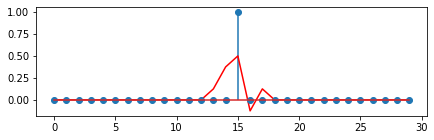

In [79]:
n = 15

y = np.zeros(2*n)
y[n] = 1

p = np.array([1,3,4,-1,1])
p = p/sum(p)

x = np.convolve(y,p,mode='same')
    
x = x/sum(x)
plt.figure(figsize=(7,2))
plt.plot(x,'r-');
plt.stem(y, use_line_collection=True);

Assuming L2 metrix, we have:

$dL/dw = 2(L-y)x$

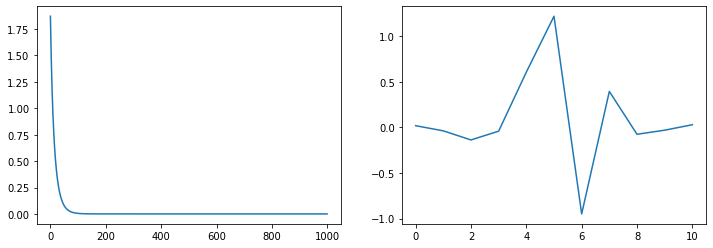

In [80]:
wing = 5    # Half-width of the deconvolution filter
w = np.random.rand(2*wing + 1)
b = 0

alpha = 0.1
n_steps = 1000

L = np.zeros(n_steps)
for t in range(n_steps):
    dw = np.zeros(len(w))
    db = 0
    for i in range(len(x)-len(w)):
        Y = np.dot(w,x[i:i+len(w)])+b     # Convolution layer
        dw += (y[i+wing]-Y)*x[i:i+len(w)]
        db += (y[i]-Y)*alpha
        L[t] += (Y-y[i+wing])**2
    w += dw*alpha
    b += db
    
# Plots
plt.figure(figsize=(12,4))
plt.subplot(121);
plt.plot(L);
plt.subplot(122);
plt.plot(w);

So an optinal filter to detect a ramp looks like a flip: down-up (if cross-correlating, as I do it here, or up-down, if using mathematical convolution, that is reversed).

What does it tell us about the shape of devonvolutional kernels? Hard to tell (it feels like I should know that, but I don't remember...)

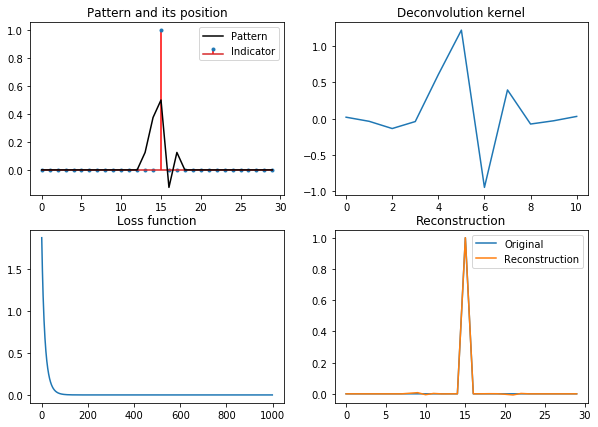

In [92]:
Y = np.zeros(len(x))
for i in range(wing,len(x)-wing):
    Y[i] = np.dot(w,x[i-wing:i+wing+1])
    
Y = np.convolve(x,np.flip(w), mode='same')+b
    
# All figures at once:
plt.figure(figsize=(10,7))
plt.subplot(221)
plt.stem(y, linefmt='r', markerfmt='.', label='Indicator', use_line_collection=True);
plt.plot(x, 'k-', label='Pattern');
plt.legend(loc='upper right')
plt.title('Pattern and its position')

plt.subplot(223);
plt.plot(L);
plt.title('Loss function')
plt.subplot(222);
plt.plot(w);
plt.title('Deconvolution kernel')

plt.subplot(224)
plt.plot(y, label='Original');
plt.plot(Y, label="Reconstruction");
plt.legend(loc='upper right');
plt.title('Reconstruction');